# Linear Regression
----
Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 
For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Import and clean data

In [3]:

data = pd.read_csv("austin_final.csv")
X = data.drop(['PrecipitationSumInches'], axis = 1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

In [4]:
# consider a random day in the dataset, we shall plot a graph and observe this day.
day_index = 400
days = [i for i in range(Y.size)]

## Train the data

In [5]:
clf = LinearRegression()
# train the classifier with our input data.
clf.fit(X, Y)
# return value R^2.
r_sq = clf.score(X, Y)
print('coefficient of determination:', r_sq)
print('intercept:', clf.intercept_)
print('slope:', clf.coef_)

coefficient of determination: 0.30447244679233
intercept: [-0.6103453]
slope: [[ 7.28405516e-06  2.32569181e-02 -3.87120305e-02  2.12409619e-02
   1.24559313e-02 -2.81976050e-02  1.28797632e-02  3.98413527e-03
  -1.22641792e-02  1.23211123e-02 -3.15143899e-03  1.04382360e-01
  -9.45018129e-02 -7.04748446e-03  4.83882460e-02 -4.20175953e-02
  -3.44113535e-03]]


## Visualization

the precipitation trend graph: 


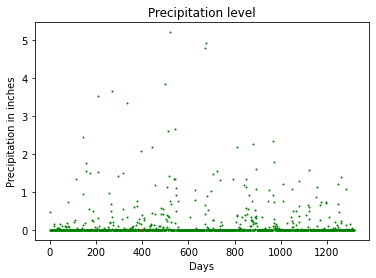

In [6]:
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g', s = 1)
plt.scatter(days[day_index], Y[day_index], color ='r', s = 1)
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

In [7]:
# predict the rainfall by separating data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

## Plot the result

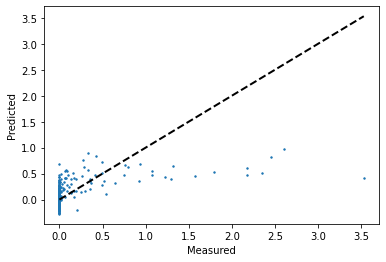

In [8]:
plt.scatter(y_test, y_pred, s = 2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.scatter( y_test.max(),  y_test.max(), color ='r')
plt.xlabel('Measured')
plt.ylabel('Predicted')

plt.show()

In [9]:
# RMSE
print("mean squared error is",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("mean absolute error is",metrics.mean_absolute_error(y_test, y_pred))

mean squared error is 0.3448907165931604
mean absolute error is 0.18018544198585779


## Conclusion
In the case, the MSE is big means that the linear regression doesn't perform well I think the data about rainfall is too complex. The linear regression could just do some simple data classification.
